# 12.6.7

In [10]:
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist

In [11]:
data = pd.read_csv('C:/Users/ekdeu/USArrests.csv', delimiter=',')

In [12]:
data.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
# Scale the specific columns
data[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(data[['Murder', 'Assault', 'UrbanPop', 'Rape']], axis=1)
# Calculate the squared Euclidean distance and correlation based distance
d_euclidean = cdist(data[['Murder', 'Assault', 'UrbanPop', 'Rape']], data[['Murder', 'Assault', 'UrbanPop', 'Rape']],
          metric='euclidean')
d_correlation = cdist(data[['Murder', 'Assault', 'UrbanPop', 'Rape']], data[['Murder', 'Assault', 'UrbanPop', 'Rape']],
          metric='correlation')

In [13]:
# Calculate the ratio of correlation based distance to squared Euclidean distance
df_relation = pd.DataFrame(d_euclidean**2/(1-d_correlation))
df_relation.describe()

C:\Users\ekdeu\AppData\Local\Temp\ipykernel_27716\2197439485.py:1: RuntimeWarning: invalid value encountered in true_divide
  new= (d_euclidean/d_correlation)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.917196,1.377766,0.768684,0.835502,0.633609,0.551528,0.636466,0.638445,0.929853,0.848389,...,0.387890,0.730992,0.490706,0.547206,0.543436,0.475501,0.400632,0.404453,3.159859,0.509535
std,2.491905,3.625065,2.114578,2.286917,1.747983,1.476750,0.579707,1.779954,2.525718,2.318681,...,0.806068,2.020526,1.366438,0.562794,0.564614,1.318453,0.867514,0.971656,2.161903,1.421946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032012,0.089498,0.016312,0.028225,0.031815,0.052559,0.176210,0.029639,0.034926,0.032570,...,0.037003,0.014472,0.035702,0.136008,0.129466,0.032512,0.062962,0.052856,1.396576,0.040784
50%,0.194972,0.371256,0.121050,0.153813,0.123040,0.114278,0.501816,0.107965,0.195236,0.163924,...,0.166428,0.110865,0.102117,0.406559,0.416032,0.105314,0.154284,0.159624,2.840412,0.097088
75%,0.661991,1.044089,0.525318,0.588041,0.389477,0.295860,0.981708,0.393930,0.673405,0.599727,...,0.392379,0.488617,0.266171,0.846270,0.819825,0.265969,0.355743,0.274510,4.886207,0.267781
max,16.482235,24.396269,13.874904,15.058890,11.408640,9.635337,2.790843,11.655091,16.705192,15.286165,...,5.393157,13.240649,8.948936,3.163273,3.277025,8.635749,5.784783,6.473499,7.762162,9.310704


# 12.6.8

In [5]:
import numpy as np
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True)

In [6]:
# Initialize PCA object with 4 components
pca = PCA(n_components=4)

# Fit te PCA model and transform the data into the prnicipal components
principalComponents = pca.fit_transform(data[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# Calculate the variance explained by each prinicipal component
print("Variance Explained (from the model): " + str(pca.explained_variance_ratio_))

# Manually calculate the variance explained by each princiapl component
print("Variance Explained (calculated manually): " + str(np.var(principalComponents, axis = 0)/data.var().sum()))

Variance Explained (from the model): [0.9453253  0.03879787 0.01587683 0.        ]
Variance Explained (calculated manually): [0.9264188  0.03802191 0.01555929 0.        ]


C:\Users\ekdeu\AppData\Local\Temp\ipykernel_27716\2367474217.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Variance Explained (calculated manually): " + str(np.var(principalComponents, axis = 0)/data.var().sum()))


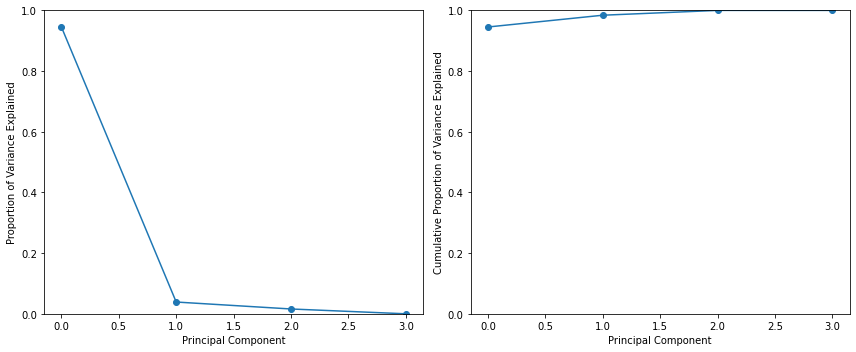

In [8]:
# plot PVE explained by each component
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.ylim([0,1])

# plot cumulative PVE
plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.ylim([0,1])
plt.tight_layout()
plt.show()